In [1]:
#Basic python library which need to import
import pandas as pd
import numpy as np

#Date stuff
from datetime import datetime
from datetime import timedelta

#Library for Nice graphing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline
#Library for statistics operation
import scipy.stats as stats

# Date Time library
from datetime import datetime


In [2]:
#Machine learning Library
import statsmodels.api as sm
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [3]:
# reading data into dataframe
df= pd.read_csv("C:/Users/adity/Downloads/Data for Associate DS.csv")

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# Find the total number of missing values in the dataframe
print ("\nMissing values :  ", df.isnull().sum().values.sum())

# printing total numbers of Unique value in the dataframe. 
print ("\nUnique values :  \n",df.nunique())


Missing values :   314

Unique values :  
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


In [7]:
# Intital descriptive analysis of data.
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Missing Value Treatment
       - Since there are missing values in the data so we are imputing them with median.

In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# CREDIT_LIMIT  and MINIMUM_PAYMENTS has missing values so we need to remove with median.

df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)

df['CREDIT_LIMIT'].count()


df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)

In [10]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Deriving The Required KPI's

**1. Monthly average purchase and cash advance amount**

In [11]:
df['Monthly_avg_purchase']= df['PURCHASES']/df['TENURE']

In [12]:
print(df['Monthly_avg_purchase'].head(),'\n ',
df['TENURE'].head(),'\n', df['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64 
  0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


### Monthly_cash_advance Amount

In [13]:
df['Monthly_cash_advance']=df['CASH_ADVANCE']/df['TENURE']

In [14]:
df[df['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

**2- Purchases by type (one-off, installments)**

- To find what type of purchases customers are making on credit card

In [15]:
df.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [16]:
def purchase(df):
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [17]:
df['purchase_type']=df.apply(purchase,axis=1)

In [18]:
df['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

## 4. Limit_usage (balance to credit limit ratio ) credit card utilization
   - Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [19]:
df['limit_usage']=df.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [20]:
df['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

## 5- Payments to minimum payments ratio etc.

In [21]:
df['PAYMENTS'].isnull().any()
df['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8950
Name: MINIMUM_PAYMENTS, dtype: int64

In [22]:
df['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       844.906767
std       2332.792322
min          0.019163
25%        170.857654
50%        312.343947
75%        788.713501
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [23]:
df['payment_minpay']=df.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [24]:
df['payment_minpay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.883197
8947    0.986076
8948    0.942505
8949    0.715439
Name: payment_minpay, Length: 8950, dtype: float64

In [25]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,istallment,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,0.332687,0.991682
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off,0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,0.681429,2.771075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,48.520000,0.000000,istallment,0.028494,6.660231
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,50.000000,0.000000,istallment,0.019183,0.883197
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,24.066667,0.000000,istallment,0.023399,0.986076
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0.000000,6.093130,none,0.026915,0.942505


In [26]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
Monthly_avg_purchase                float64
Monthly_cash_advance                float64
purchase_type                        object
limit_usage                         float64
payment_minpay                  

In [27]:
# log tranformation
df_log = df.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [29]:
df_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [30]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
df_pre=df_log[[x for x in df_log.columns if x not in col ]]

In [31]:
df_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay'],
      dtype='object')

In [32]:
df_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

In [33]:
x=df.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

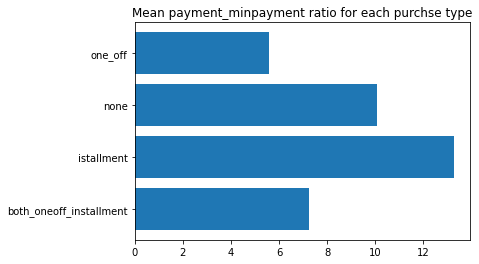

In [34]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')


# customers with installment purchases are paying dues 

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

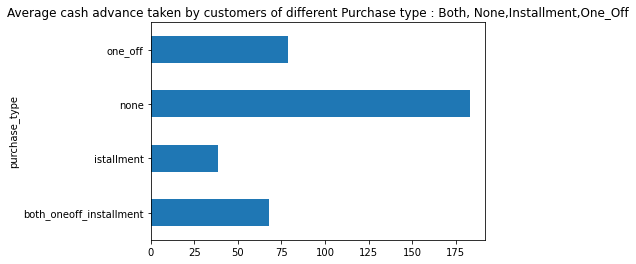

In [35]:
df[df['purchase_type']=='n']
df.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

## Customers who don't do either one-off or installment purchases take more cash on advance

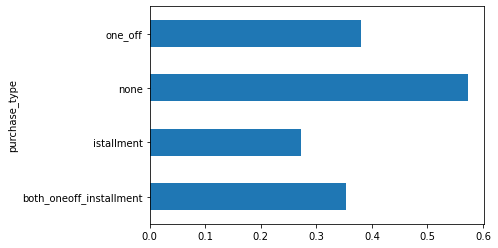

In [36]:
df.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

In [37]:
df_original=pd.concat([df,pd.get_dummies(df['purchase_type'])],axis=1)

In [38]:
#Preparing Machine learning algorithm
# creating Dummies for categorical variable
df_pre['purchase_type']=df.loc[:,'purchase_type']
pd.get_dummies(df_pre['purchase_type'])

,both_oneoff_installment,istallment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


In [39]:
#Now merge the created dummy with the original data frame
df_dummy=pd.concat([df_pre,pd.get_dummies(df_pre['purchase_type'])],axis=1)

In [40]:
l=['purchase_type']

In [41]:
df_dummy=df_dummy.drop(l,axis=1)
df_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpay                      False
both_oneoff_installment             False
istallment                          False
none                                False
one_off                             False
dtype: bool

In [42]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   Monthly_avg_purchase              8950 non-null   float64
 10  Monthly_cash_advance              8950 non-null   float64
 11  limit_usage                       8950 non-null   float64
 12  paymen

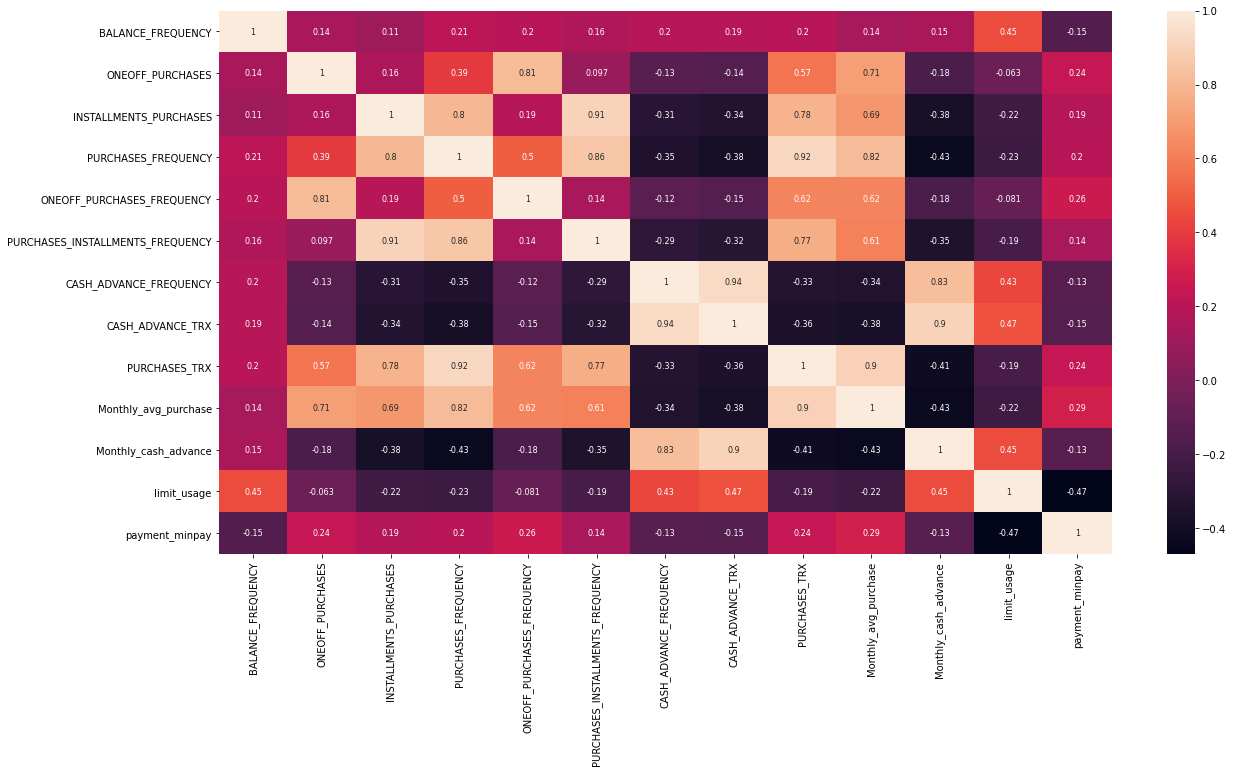

In [43]:
# Correlation plot
df_num = df_dummy.select_dtypes(include=['int64','float64'])
correlation = df_num.corr()

plt.figure(figsize=(20,10))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True, annot_kws={"size": 8})

**Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data**

- Before applying PCA we will standardize data  to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

# Standardrizing data 
- To put data on the same scale 

In [48]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()

In [49]:
df_dummy.shape


(8950, 17)

In [50]:
df_scaled=sc.fit_transform(df_dummy)
df_scaled


array([[-0.14875746, -0.98708958,  0.39447984, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [ 0.17961568, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [ 0.49271003,  1.06202168, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249],
       ...,
       [-0.09290575, -0.98708958,  0.52779444, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [-0.09290575, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [-0.73437135,  1.16861854, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249]])

In [52]:
# Applying PCA

#With the help of principal component analysis we will reduce features

from sklearn.decomposition import PCA
df_dummy.shape

(8950, 17)

In [54]:
#We have 17 features so our n_component will be 17.
pc=PCA(n_components=17)
df_pca=pc.fit(df_scaled)

In [55]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(df_pca.explained_variance_ratio_)

1.0

In [57]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    df_pca=pc.fit(df_scaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

In [58]:
var_ratio

{2: 0.5826439793960287,
 3: 0.7299379309512699,
 4: 0.8115442762351271,
 5: 0.877055579529142,
 6: 0.9186492443512613,
 7: 0.9410925256030136,
 8: 0.9616114053683062,
 9: 0.9739787081990652,
 10: 0.9835896584630708,
 11: 0.9897248107341955,
 12: 0.9927550009135238,
 13: 0.9953907562385425,
 14: 0.9979616898169594,
 15: 0.9996360473172955,
 16: 1.0,
 17: 1.0}

*Since 6 components are explaining about 90% variance so we select 5 components*

In [60]:
pc=PCA(n_components=6)

In [62]:
p=pc.fit(df_scaled)

In [63]:
df_scaled.shape

(8950, 17)

In [64]:
p.explained_variance_

array([6.83574755, 3.07030693, 2.50427698, 1.38746289, 1.1138166 ,
       0.70717132])

In [65]:
np.sum(p.explained_variance_)

15.618782269308804

In [66]:
var_ratio

{2: 0.5826439793960287,
 3: 0.7299379309512699,
 4: 0.8115442762351271,
 5: 0.877055579529142,
 6: 0.9186492443512613,
 7: 0.9410925256030136,
 8: 0.9616114053683062,
 9: 0.9739787081990652,
 10: 0.9835896584630708,
 11: 0.9897248107341955,
 12: 0.9927550009135238,
 13: 0.9953907562385425,
 14: 0.9979616898169594,
 15: 0.9996360473172955,
 16: 1.0,
 17: 1.0}

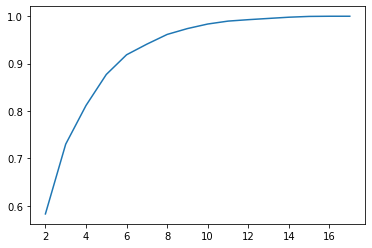

In [67]:
pd.Series(var_ratio).plot()

*Since 5 components are explaining about 87% variance so we select 5 components*

In [68]:
pc_final=PCA(n_components=6).fit(df_scaled)

reduced_df=pc_final.fit_transform(df_scaled)

In [69]:
dd=pd.DataFrame(reduced_df)

In [71]:
dd.head(10)

,0,1,2,3,4,5
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214
5,1.166988,-1.948285,-1.522135,-2.182644,-0.219215,-0.081526
6,4.736369,1.585391,0.493930,1.770229,-0.417299,-1.196805
7,1.543426,-2.141559,-1.663893,-1.792658,-0.034327,-0.415331
8,1.527820,0.178269,0.503805,0.254611,-1.453263,0.480370
9,0.238800,-0.048139,3.750621,0.436066,0.886273,-0.113153


*So initially we had 17 variables now its 5 so our variable go reduced*

In [72]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
PC_5    0.041594
dtype: float64

# Clustering

In [73]:
from sklearn.cluster import KMeans

In [75]:
km_4=KMeans(n_clusters=4,random_state=123)

In [77]:
km_4.fit(reduced_df)

KMeans(n_clusters=4, random_state=123)

In [78]:
km_4.labels_

array([0, 1, 3, ..., 0, 1, 3])

In [79]:
pd.Series(km_4.labels_).value_counts()

2    2769
0    2224
1    2088
3    1869
dtype: int64

In [81]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_df )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [82]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,139772.482528
1,2,93309.249104
2,3,70748.240493
3,4,49446.117178
4,5,42548.725155
5,6,37713.260325
6,7,34124.520455
7,8,31507.367769
8,9,28866.099664
9,10,26302.916927


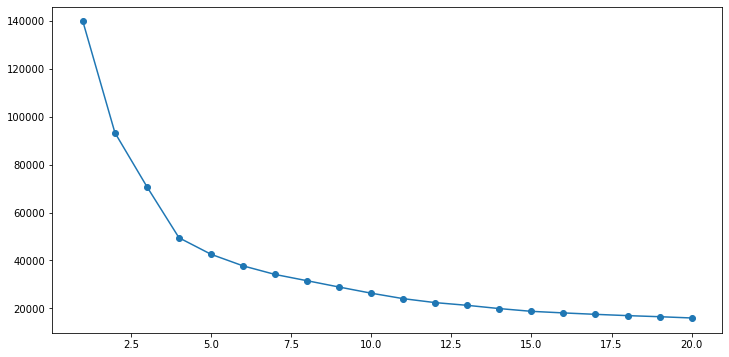

In [83]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

From above graph we will find elbow range. here it is 4,5,6

In [84]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_df)
    scores.append(metrics.silhouette_score(reduced_df, km.labels_))

In [85]:
scores

[0.33113628388878247,
 0.35431811161205384,
 0.43708577439659474,
 0.4312227676966942,
 0.42263537631336356,
 0.3935854567599128,
 0.41805236796576206,
 0.3888774421675496,
 0.3934512405824182,
 0.3678772130648562,
 0.367000156240062,
 0.3513293979455327,
 0.3525965567774654,
 0.32956074855724693,
 0.33389461989573,
 0.33820715365121445,
 0.3354645505673166,
 0.33040681324630283,
 0.32159407885673597]

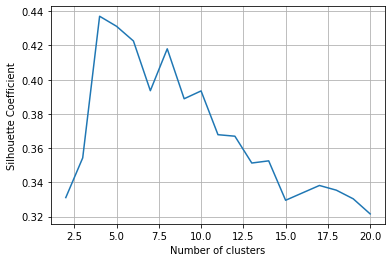

In [86]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

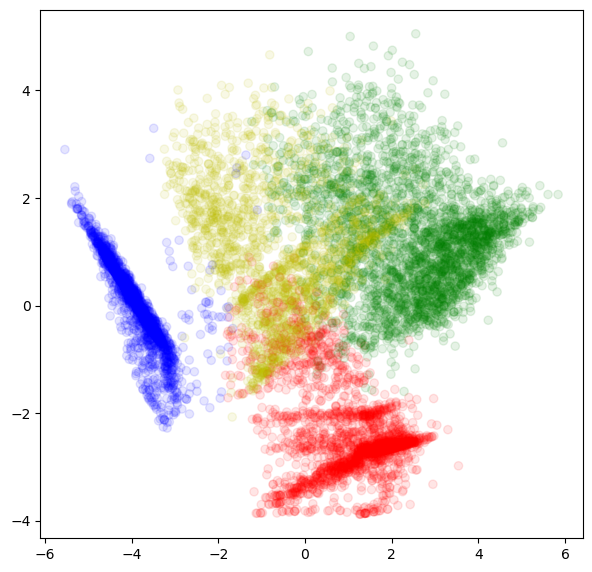

In [90]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7),dpi=100)
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=label_color,cmap='Spectral',alpha=0.1)

In [92]:
# Key performace variable selection . here i am taking varibales which we will use in derving new KPI. 
#We can take all 17 variables but it will be difficult to interprate.So are are selecting less no of variables.

col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','istallment','one_off','none','CREDIT_LIMIT']

In [93]:
df_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [95]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([df_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [96]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,istallment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,0
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,3
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,3
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,3


In [97]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,12.062050,0.043582,33.013723,7.127341
Monthly_avg_purchase,47.626256,0.148297,193.008043,69.875917
Monthly_cash_advance,33.550080,186.281319,67.466910,78.098613
limit_usage,0.264745,0.576076,0.353591,0.379761
CASH_ADVANCE_TRX,1.021133,6.540230,2.804261,2.881220
payment_minpay,13.422420,9.936617,7.245651,5.573672
both_oneoff_installment,0.000000,0.001916,1.000000,0.000535
istallment,1.000000,0.017241,0.000000,0.000000
one_off,0.000000,0.002874,0.000000,0.999465
none,0.000000,0.977969,0.000000,0.000000


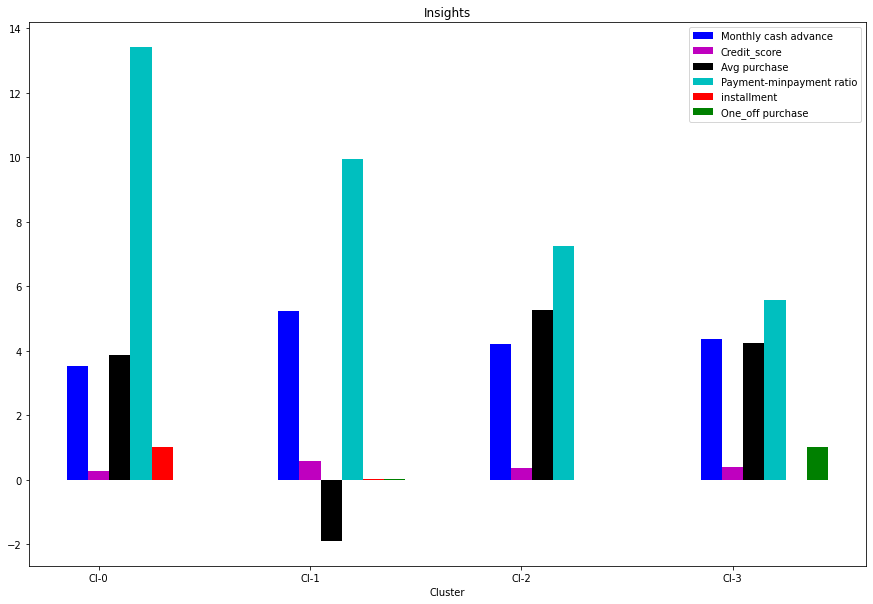

In [98]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['istallment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()


- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio. *** This group is about 21% of the total customer base ***



- Cluster 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***


In [99]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0    2224
1          1    2088
2          2    2769
3          3    1869
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0  2224   24.849162
1  2088   23.329609
2  2769   30.938547
3  1869   20.882682


# Finding behaviour with 5 Clusters:

In [100]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_df)
km_5.labels_

array([3, 0, 1, ..., 3, 0, 1])

In [101]:
pd.Series(km_5.labels_).value_counts()

3    2147
0    2082
2    1977
1    1862
4     882
dtype: int64

Text(0, 0.5, 'PC_1')

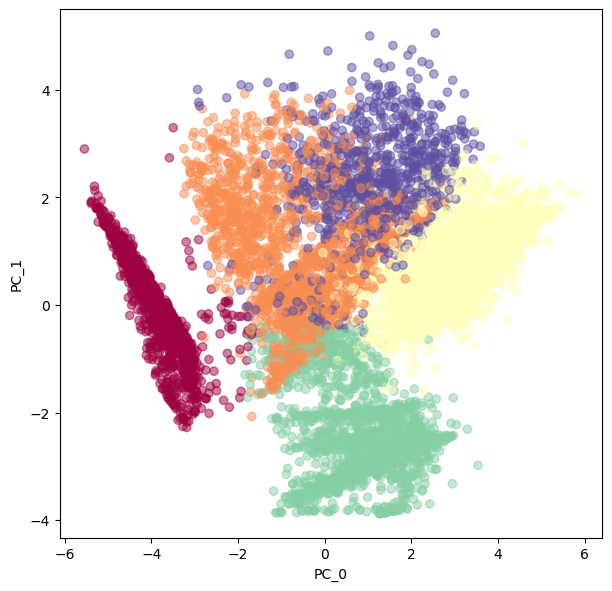

In [103]:
plt.figure(figsize=(7,7),dpi=100)
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [104]:
cluster_df_5=pd.concat([df_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [105]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,0.033141,7.096670,34.587759,11.910107,27.685941
Monthly_avg_purchase,0.092654,68.917645,210.536468,47.400083,141.441791
Monthly_cash_advance,185.097327,74.517541,4.040708,20.477295,249.745380
limit_usage,0.576097,0.377959,0.258931,0.249543,0.600498
CASH_ADVANCE_TRX,6.449087,2.697637,0.152757,0.543083,10.384354
payment_minpay,9.959037,5.562287,8.675499,13.795305,3.648349
both_oneoff_installment,0.000000,0.002148,1.000000,0.000000,0.899093
istallment,0.016330,0.000000,0.000000,1.000000,0.089569
one_off,0.002882,0.997852,0.000000,0.000000,0.011338
none,0.980788,0.000000,0.000000,0.000000,0.000000


#Conclusion With 5 clusters : 

- we have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

- Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side


---
 
<big>

***So we don't have quite distinguishable characteristics with 5 clusters,***

 # Finding behavior with 6 clusters

In [108]:
km_6=KMeans(n_clusters=6).fit(reduced_df)
km_6.labels_

array([2, 0, 3, ..., 2, 0, 5])

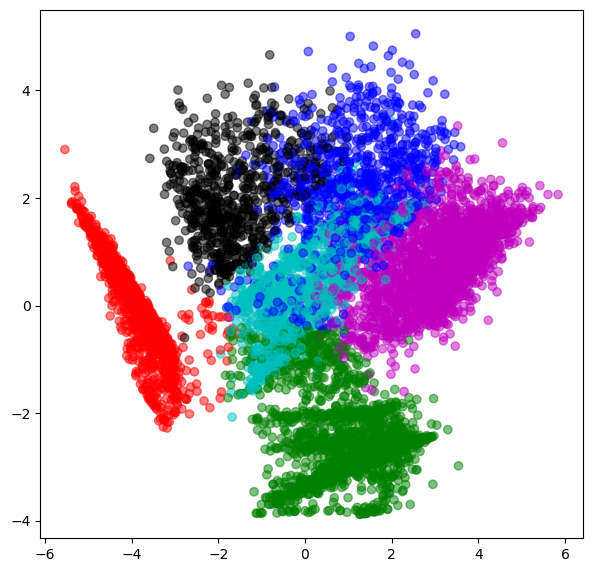

In [110]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7),dpi=100)
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=label_color,cmap='Spectral',alpha=0.5)


In [111]:
cluster_df_6 = pd.concat([df_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [112]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,0.029398,27.872146,11.905493,7.760575,34.663789,5.967143
Monthly_avg_purchase,0.078945,140.096254,47.384384,78.585295,211.196582,54.091602
Monthly_cash_advance,184.574967,243.203509,20.610894,3.603272,4.027720,205.502536
limit_usage,0.575675,0.601147,0.249683,0.245772,0.258206,0.605930
CASH_ADVANCE_TRX,6.414458,10.044521,0.546089,0.125212,0.150838,7.642857
payment_minpay,9.980891,3.610482,13.789513,6.911822,8.702974,3.257979
both_oneoff_installment,0.000000,0.909817,0.000000,0.006768,1.000000,0.000000
istallment,0.015904,0.090183,1.000000,0.000000,0.000000,0.000000
one_off,0.000000,0.000000,0.000000,0.993232,0.000000,1.000000
none,0.984096,0.000000,0.000000,0.000000,0.000000,0.000000


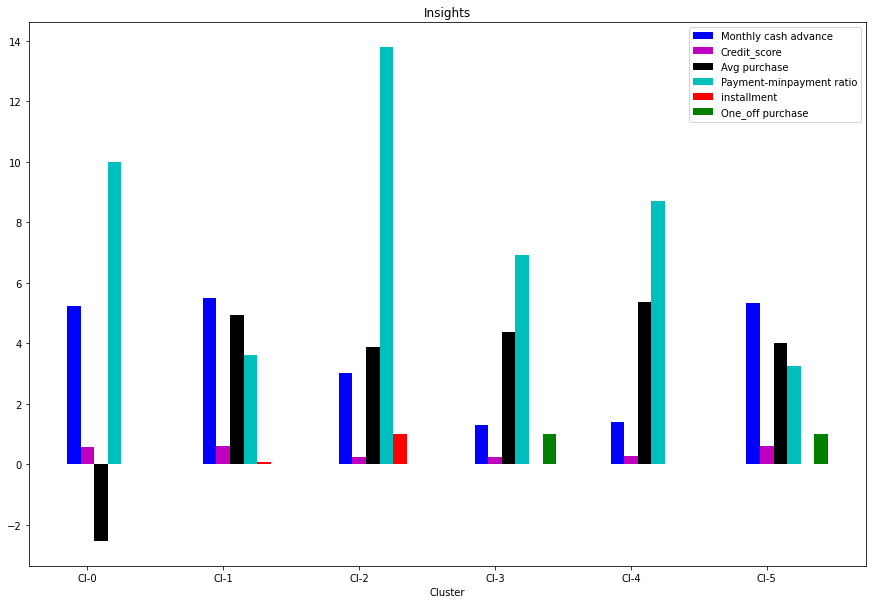

In [113]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['istallment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [115]:
cluster_df_4

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,istallment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,0
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,3
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,3
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,6,48.520000,0.000000,0.028494,0,6.660231,0,1,0,0,1000.0,0
8946,6,50.000000,0.000000,0.019183,0,0.883197,0,1,0,0,1000.0,0
8947,5,24.066667,0.000000,0.023399,0,0.986076,0,1,0,0,1000.0,0
8948,0,0.000000,6.093130,0.026915,2,0.942505,0,0,0,1,500.0,1


In [116]:
cluster_df_4.to_csv("Results_for_Cluster.csv", index = False)

*Performance metrics also suggest that  K-means with 4 cluster is able to show distinguished characteristics of each cluster.*

*Insights with 4 Clusters***



- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. ***This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. ***This group is about 23% of the total customer base***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio and credit_score on lower side ***This group is about 21% of the total customer base***



- Cluster 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases.*** This group is about 25% of the total customer base***



# Marketing Strategy Suggested:

#### a. Group 2
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyality cards to increase transactions
       
#### b. Group 1
   - They have poor credit score and taking only cash on advance. We can target them by providing  less interest rate on purchase transaction
   
#### c. Group 0
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
   
#### d. Group 3
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.
       